In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

604

In [6]:
# Import the datetime module from the datetime library.
from datetime import datetime
import requests 
# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)



http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=82bac096f36fb4870bf8d6e6f8c04c3a


In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [9]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city = cities[i]
    city_url = url + "&q=" + city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    

Processing Record 1 of Set 1 | pisco
Processing Record 1 of Set 1 | matara
Processing Record 1 of Set 1 | torbay
Processing Record 1 of Set 1 | cabo san lucas
Processing Record 1 of Set 1 | carmen
Processing Record 1 of Set 1 | taolanaro
Processing Record 1 of Set 1 | imbituba
Processing Record 1 of Set 1 | geraldton
Processing Record 1 of Set 1 | burica
Processing Record 1 of Set 1 | rikitea
Processing Record 1 of Set 1 | broome
Processing Record 1 of Set 1 | mataura
Processing Record 1 of Set 1 | busselton
Processing Record 1 of Set 1 | gimli
Processing Record 1 of Set 1 | rafaela
Processing Record 1 of Set 1 | butaritari
Processing Record 1 of Set 1 | albany
Processing Record 1 of Set 1 | mar del plata
Processing Record 1 of Set 1 | begunitsy
Processing Record 1 of Set 1 | bredasdorp
Processing Record 1 of Set 1 | georgetown
Processing Record 1 of Set 1 | mayo
Processing Record 1 of Set 1 | anadyr
Processing Record 1 of Set 1 | vaini
Processing Record 1 of Set 1 | sao filipe
Process

In [10]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 13 | pisco
Processing Record 2 of Set 13 | matara
Processing Record 3 of Set 13 | torbay
Processing Record 4 of Set 13 | cabo san lucas
Processing Record 5 of Set 13 | carmen
Processing Record 6 of Set 13 | taolanaro
City not found. Skipping...
Processing Record 7 of Set 13 | imbituba
Processing Record 8 of Set 13 | geraldton
Processing Record 9 of Set 13 | burica
City not found. Skipping...
Processing Record 10 of Set 13 | rikitea
Processing Record 11 of Set 13 | broome
Processing Record 12 of Set 13 | mataura
Processing Record 13 of Set 13 | busselton
Processing Record 14 of Set 13 | gimli
Processing Record 15 of Set 13 | rafaela
Processing Record 16 of Set 13 | butaritari
Processing Record 17 of Set 13 | albany
Processing Record 18 of Set 13 | mar del plata
Processing Record 19 of Set 13 | begunitsy
Processing Record 20 of Set 13 | bredasdorp
Processing Record 21 of Set 13 | georgetown
Processing Record 22 of Set 13 | mayo
Processing Record 23 of Set 13 | 

Processing Record 36 of Set 16 | mutsamudu
City not found. Skipping...
Processing Record 37 of Set 16 | thompson
Processing Record 38 of Set 16 | kaitangata
Processing Record 39 of Set 16 | creel
Processing Record 40 of Set 16 | ponta do sol
Processing Record 41 of Set 16 | la ronge
Processing Record 42 of Set 16 | oyon
Processing Record 43 of Set 16 | chumikan
Processing Record 44 of Set 16 | kailua
Processing Record 45 of Set 16 | vilhena
Processing Record 46 of Set 16 | port lincoln
Processing Record 47 of Set 16 | thinadhoo
Processing Record 48 of Set 16 | celestun
Processing Record 49 of Set 16 | longyearbyen
Processing Record 50 of Set 16 | narsaq
Processing Record 1 of Set 17 | daru
Processing Record 2 of Set 17 | college
Processing Record 3 of Set 17 | bria
Processing Record 4 of Set 17 | mae sai
Processing Record 5 of Set 17 | lata
Processing Record 6 of Set 17 | lubango
Processing Record 7 of Set 17 | fairbanks
Processing Record 8 of Set 17 | labuhan
Processing Record 9 of Se

Processing Record 17 of Set 20 | zhigalovo
Processing Record 18 of Set 20 | pitkyaranta
Processing Record 19 of Set 20 | basavakalyan
Processing Record 20 of Set 20 | belmonte
Processing Record 21 of Set 20 | camacha
Processing Record 22 of Set 20 | sinjar
Processing Record 23 of Set 20 | juneau
Processing Record 24 of Set 20 | iqaluit
Processing Record 25 of Set 20 | bonthe
Processing Record 26 of Set 20 | hami
Processing Record 27 of Set 20 | husavik
Processing Record 28 of Set 20 | varca
Processing Record 29 of Set 20 | shu
Processing Record 30 of Set 20 | bolshaya chernigovka
City not found. Skipping...
Processing Record 31 of Set 20 | korla
City not found. Skipping...
Processing Record 32 of Set 20 | verkhniye tatyshly
Processing Record 33 of Set 20 | puerto leguizamo
Processing Record 34 of Set 20 | atikokan
Processing Record 35 of Set 20 | grand river south east
City not found. Skipping...
Processing Record 36 of Set 20 | lhokseumawe
Processing Record 37 of Set 20 | nelson
Proce

Processing Record 47 of Set 23 | srednekolymsk
Processing Record 48 of Set 23 | port keats
Processing Record 49 of Set 23 | innisfail
Processing Record 50 of Set 23 | coahuayana
Processing Record 1 of Set 24 | saint anthony
Processing Record 2 of Set 24 | attawapiskat
City not found. Skipping...
Processing Record 3 of Set 24 | fort nelson
Processing Record 4 of Set 24 | bilibino
Processing Record 5 of Set 24 | zboriste
Processing Record 6 of Set 24 | edd
Processing Record 7 of Set 24 | juruti
Processing Record 8 of Set 24 | rietavas
Processing Record 9 of Set 24 | samarai
Processing Record 10 of Set 24 | cap malheureux
Processing Record 11 of Set 24 | porto belo
Processing Record 12 of Set 24 | khatra
Processing Record 13 of Set 24 | balbalan
Processing Record 14 of Set 24 | los andes
Processing Record 15 of Set 24 | nome
Processing Record 16 of Set 24 | bukachacha
Processing Record 17 of Set 24 | shenjiamen
Processing Record 18 of Set 24 | manado
Processing Record 19 of Set 24 | marsa

In [11]:
len(city_data)

541

In [12]:
city_data

[{'City': 'Pisco',
  'Lat': -13.71,
  'Lng': -76.2,
  'Max Temp': 70,
  'Humidity': 83,
  'Cloudiness': 90,
  'Wind Speed': 16.11,
  'Country': 'PE',
  'Date': '2020-01-05 04:01:15'},
 {'City': 'Matara',
  'Lat': -3.48,
  'Lng': 29.48,
  'Max Temp': 56.64,
  'Humidity': 87,
  'Cloudiness': 53,
  'Wind Speed': 2.48,
  'Country': 'BI',
  'Date': '2020-01-05 04:01:15'},
 {'City': 'Torbay',
  'Lat': 47.66,
  'Lng': -52.73,
  'Max Temp': 30,
  'Humidity': 86,
  'Cloudiness': 75,
  'Wind Speed': 9.17,
  'Country': 'CA',
  'Date': '2020-01-05 04:01:15'},
 {'City': 'Cabo San Lucas',
  'Lat': 22.89,
  'Lng': -109.91,
  'Max Temp': 69.01,
  'Humidity': 82,
  'Cloudiness': 40,
  'Wind Speed': 8.05,
  'Country': 'MX',
  'Date': '2020-01-05 03:59:58'},
 {'City': 'Carmen',
  'Lat': 7.36,
  'Lng': 125.71,
  'Max Temp': 86,
  'Humidity': 74,
  'Cloudiness': 40,
  'Wind Speed': 6.93,
  'Country': 'PH',
  'Date': '2020-01-05 04:01:16'},
 {'City': 'Imbituba',
  'Lat': -28.24,
  'Lng': -48.67,
  'Max Temp

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Pisco,-13.71,-76.20,70.00,83,90,16.11,PE,2020-01-05 04:01:15
1,Matara,-3.48,29.48,56.64,87,53,2.48,BI,2020-01-05 04:01:15
2,Torbay,47.66,-52.73,30.00,86,75,9.17,CA,2020-01-05 04:01:15
3,Cabo San Lucas,22.89,-109.91,69.01,82,40,8.05,MX,2020-01-05 03:59:58
4,Carmen,7.36,125.71,86.00,74,40,6.93,PH,2020-01-05 04:01:16
5,Imbituba,-28.24,-48.67,71.60,94,75,4.70,BR,2020-01-05 04:01:16
6,Geraldton,49.72,-86.95,14.00,85,90,2.24,CA,2020-01-05 04:01:17
7,Rikitea,-23.12,-134.97,76.08,80,67,18.99,PF,2020-01-05 04:01:17
8,Broome,52.47,1.45,44.60,81,0,6.93,GB,2020-01-05 04:01:17
9,Mataura,-46.19,168.86,57.99,61,100,18.99,NZ,2020-01-05 04:01:18


In [14]:
new_column_order = ["City", 'Country', 'Date', 'Lat','Lng', 'Max Temp','Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Pisco,PE,2020-01-05 04:01:15,-13.71,-76.20,70.00,83,90,16.11
1,Matara,BI,2020-01-05 04:01:15,-3.48,29.48,56.64,87,53,2.48
2,Torbay,CA,2020-01-05 04:01:15,47.66,-52.73,30.00,86,75,9.17
3,Cabo San Lucas,MX,2020-01-05 03:59:58,22.89,-109.91,69.01,82,40,8.05
4,Carmen,PH,2020-01-05 04:01:16,7.36,125.71,86.00,74,40,6.93
...,...,...,...,...,...,...,...,...,...
536,Solnechnyy,RU,2020-01-05 04:04:05,50.72,136.64,-2.34,87,0,3.13
537,Itarema,BR,2020-01-05 04:04:05,-2.92,-39.92,76.26,91,100,2.75
538,Sulangan,PH,2020-01-05 04:04:05,11.14,123.72,81.00,77,10,13.67
539,Kununurra,AU,2020-01-05 04:04:06,-15.77,128.74,95.00,44,90,10.29


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")  
#

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [17]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1578197048.20383

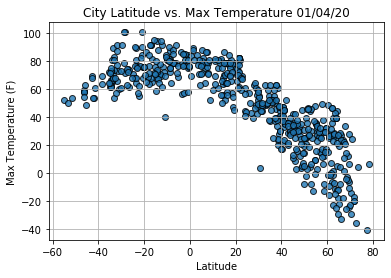

In [18]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()



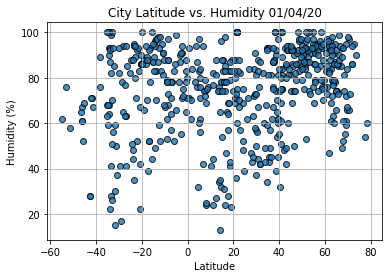

In [19]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

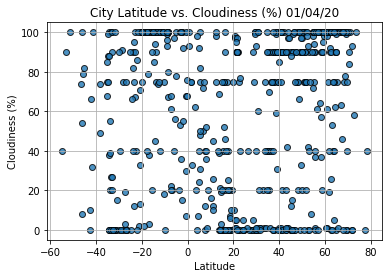

In [20]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

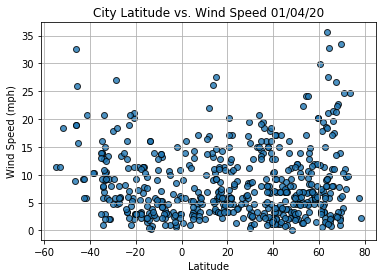

In [21]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [30]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [40]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [32]:
index13 = city_data_df.loc[13]
index13

City                   Butaritari
Country                        KI
Date          2020-01-05 04:01:19
Lat                          3.07
Lng                        172.79
Max Temp                    84.16
Humidity                       78
Cloudiness                     62
Wind Speed                  11.83
Name: 13, dtype: object

In [33]:
city_data_df["Lat"] >= 0

0      False
1      False
2       True
3       True
4       True
       ...  
536     True
537    False
538     True
539    False
540     True
Name: Lat, Length: 541, dtype: bool

In [34]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Torbay,CA,2020-01-05 04:01:15,47.66,-52.73,30.00,86,75,9.17
3,Cabo San Lucas,MX,2020-01-05 03:59:58,22.89,-109.91,69.01,82,40,8.05
4,Carmen,PH,2020-01-05 04:01:16,7.36,125.71,86.00,74,40,6.93
6,Geraldton,CA,2020-01-05 04:01:17,49.72,-86.95,14.00,85,90,2.24
8,Broome,GB,2020-01-05 04:01:17,52.47,1.45,44.60,81,0,6.93


In [35]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

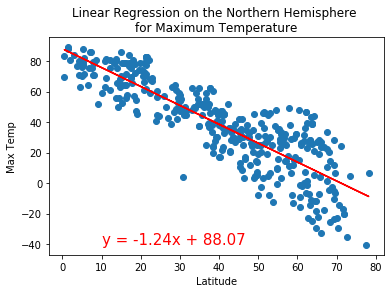

In [55]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Maximum Temperature',
                       'Max Temp',(10,-40))

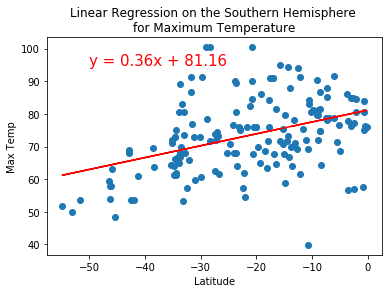

In [61]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Maximum Temperature',
                       'Max Temp',(-50,95))

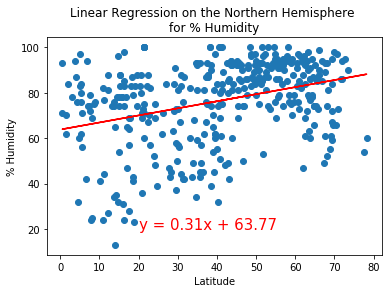

In [73]:
# Linear regression on the Northern Hemisphere
cvalue = 'Humidity'
clabel = '% ' + cvalue
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df[cvalue]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor '+clabel,
                       clabel,(20,20))

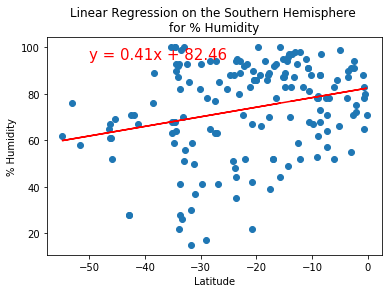

In [79]:
# Linear regression on the Southern Hemisphere
cvalue = 'Humidity'
clabel = '% ' + cvalue
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df[cvalue]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor '+clabel,
                       clabel,(-50,95))

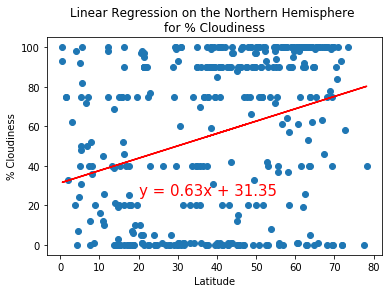

In [82]:
# Linear regression on the Northern Hemisphere
cvalue = 'Cloudiness'
clabel = '% ' + cvalue
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df[cvalue]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor '+clabel,
                       clabel,(20,25))

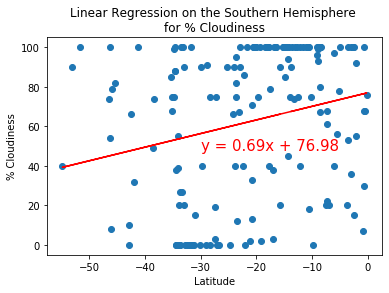

In [88]:
# Linear regression on the Southern Hemisphere
cvalue = 'Cloudiness'
clabel = '% ' + cvalue
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df[cvalue]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor '+clabel,
                       clabel,(-30,48))

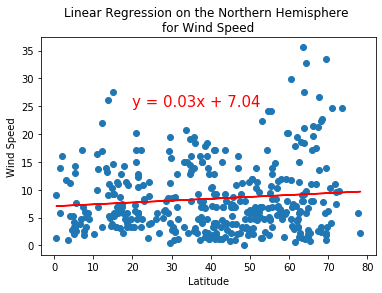

In [90]:
# Linear regression on the Northern Hemisphere
cvalue = 'Wind Speed'
clabel = '' + cvalue
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df[cvalue]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor '+clabel,
                       clabel,(20,25))

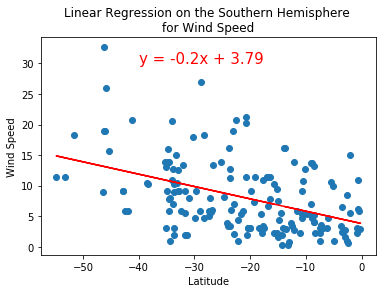

In [92]:
# Linear regression on the Southern Hemisphere
cvalue = 'Wind Speed'
clabel = '' + cvalue
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df[cvalue]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor '+clabel,
                       clabel,(-40,30))